In [42]:
import unicodedata
import pandas as pd


def strip_accents(text):

    try:
        text = unicode(text, 'utf-8')
    except NameError: # unicode is a default on python 3 
        pass

    text = unicodedata.normalize('NFD', text)\
           .encode('ascii', 'ignore')\
           .decode("utf-8")

    return str(text)

df = pd.read_csv("../data/processed/chequeado_processed.csv", index_col=0)
df['Date'] = pd.to_datetime(df['Data de publicação'], format="%d/%m/%Y", errors="coerce")
df['Afirmação checada stripped'] = df['Afirmação checada'].apply(strip_accents)
translated_afirmacao_sent = pd.read_csv("../data/processed/Afirmação_checada_en_lemma_sentiment.csv", index_col=0)
translated_afirmacao_trans = pd.read_csv("../data/processed/Afirmação_checada_full_translation.csv", index_col=0)

translated_descricao_sent = pd.read_csv("../data/processed/Descrição_en_lemma_sentiment.csv", index_col=0)
translated_descricao_trans = pd.read_csv("../data/processed/Descrição_full_translation.csv", index_col=0)

proc_text = pd.read_csv("../data/processed/processed_text2-spanish.csv")
for col in ['body_stem_title_sent', 'body_stem_desc_sent']:
    proc_text[col] = pd.to_numeric(proc_text[col], errors='coerce')

sentiment_comparison_with_date = (
    df
.join(translated_afirmacao_sent)
    .join(translated_descricao_sent)
    .join(translated_afirmacao_trans)
    .join(translated_descricao_trans)
    .join(
        proc_text.set_index('original title')[['body_stem_title_sent', 'body_stem_desc_sent']],
        on='Afirmação checada stripped', how='inner')
    .drop(columns=['Afirmação checada stripped'])
    .rename(columns={
        'Afirmação_checada_en_lemma_sentiment': 'en_lemma_title_sent',
        'Descrição_en_lemma_sentiment': 'en_lemma_desc_sent'})
)
for col in [col for col in sentiment_comparison_with_date.columns if col.startswith('en_')]:
    sentiment_comparison_with_date[col] = (sentiment_comparison_with_date[col] + 1.0) / 2.0

In [26]:
import pandas as pd 
df = pd.read_csv("../reports/figures/sentiment_comparison.csv", index_col=0)
df = df.sort_values('sent_distance', ascending=False)

In [32]:
df.columns

Index(['País', 'Título', 'Calificación', 'Descripción', 'Fecha del chequeo',
       'Organización', 'Link al chequeo', 'Tipo de información',
       'Formato de la desinformación', 'Tipo de nota',
       'Link a la desinformación', 'Fecha detección desinformación', 'Origen',
       'Persona', 'Actualizaciones', 'Circuló en otros países', 'Unnamed: 16',
       'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'en_title_sent',
       'en_desc_sent', 'en_lemma_title_sent', 'en_lemma_desc_sent',
       'Título_full_translation', 'Descripción_full_translation',
       'body_lem_title_sent', 'body_stem_title_sent', 'body_lem_desc_sent',
       'body_stem_desc_sent', 'sent_distance'],
      dtype='object')

In [36]:
df[['Título', 'Título_full_translation', 'sent_distance', 'body_lem_title_sent', 'en_lemma_title_sent']].head(15)

Título  \
3589  ¿Son útiles las cintas o tiras de sujeción de ...   
3788  Un video de la actriz Victoria Abril en el que...   
2095  Imágenes de un hombre vestido con una bata de ...   
3696  Una imagen en redes sociales asegura que el cu...   
3772  Una  imagen que asegura que las personas sanas...   
93    Un grupo de personas logran alcalinizar su cue...   
2048  La prueba del vinagre es efectiva para detecta...   
2280  Poner una hoja de eucalipto entre dos máscaras...   
2515  Una imagen que asegura que las pruebas rápidas...   
126   Un español que ha aterrizado en el aeropuerto ...   
2472  Una médica salvadoreña publicó un protocolo pa...   
1764  Ismael Reyes, candidato presidencial del Parti...   
165   La lejía o el cloro son útiles para limpiar y ...   
945   Imagen del político Pablo Casado, presidente d...   
2348  ¿Qué sabemos sobre si Bolivia ha aprobado el u...   

                                Título_full_translation  sent_distance  \
3589  Are mask fasteners or straps placed behind the...       0.931517   
3788  A video by actress Victoria Abril in which she...       0.931422   
2095  Images of a man dressed in a hospital gown who...       0.911854   
3696  An image on social networks ensures that the m...       0.891705   
3772  An image that ensures that healthy people have...       0.889940   
93    A group of people manage to alkalize their bod...       0.880712   
2048  Vinegar test is effective in detecting positiv...       0.855591   
2280  Putting a eucalyptus leaf between two face mas...       0.853670   
2515  An image that ensures that the rapid tests use...       0.842584   
126   A Spaniard who has landed at the Barajas airpo...       0.838028   
2472  A Salvadoran doctor published a protocol for p...       0.836980   
1764  Ismael Reyes, presidential candidate of the In...       0.835000   
165   Bleach or chlorine is helpful in cleaning and ...       0.829050   
945   Image of the politician Pablo Casado, presiden...       0.810579   
2348  What do we know about whether Bolivia has appr...       0.808572   

      body_lem_title_sent  en_lemma_title_sent  
3589             0.005983              0.93750  
3788             0.012728              0.94415  
2095             0.031146              0.94300  
3696             0.005445              0.89715  
3772             0.002310              0.89225  
93               0.001788              0.88250  
2048             0.030259              0.88585  
2280             0.014230              0.86790  
2515             0.024966              0.86755  
126              0.999478              0.16145  
2472             0.003420              0.84040  
1764             0.000250              0.83525  
165              0.011350              0.84040  
945              0.024671              0.83525  
2348             0.003878              0.81245

/Users/rahul/opt/miniconda3/envs/lost-in-translation/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Distance')

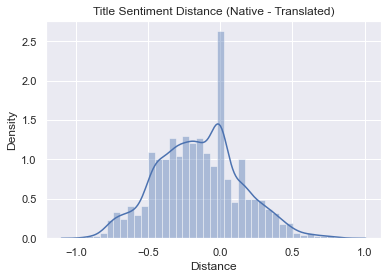

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
fig, ax = plt.subplots()

df['title_sent_distance'] = df['body_lem_title_sent'] - df['en_lemma_title_sent']
sns.distplot(df.title_sent_distance, ax=ax)
ax.set_title("Title Sentiment Distance (Native - Translated)")
ax.set_xlabel('Distance')

/Users/rahul/opt/miniconda3/envs/lost-in-translation/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Distance')

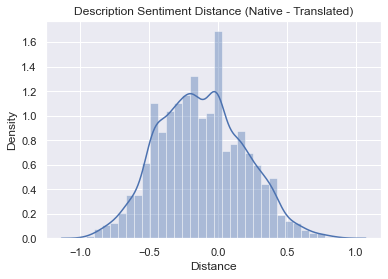

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
fig, ax = plt.subplots()
df['desc_sent_distance'] = df['body_lem_desc_sent'] - df['en_lemma_desc_sent']
sns.distplot(df.desc_sent_distance, ax=ax)
ax.set_title("Description Sentiment Distance (Native - Translated)")
ax.set_xlabel('Distance')

In [15]:
print(non_zero_sort.iloc[4]["Afirmação checada"])
print(non_zero_sort.iloc[4]["Afirmação checada_full_translation"])


NameError: name 'non_zero_sort' is not defined

In [13]:
sia.polarity_scores(non_zero_sort.iloc[0]["Afirmação checada_full_translation"])

{'neg': 0.064, 'neu': 0.734, 'pos': 0.202, 'compound': 0.6124}

In [15]:
import stanza
import numpy as np
nlp_en = stanza.Pipeline(lang='en', processors='tokenize,lemma')
doc = nlp_en(non_zero_sort['Afirmação checada_full_translation'].iloc[0])
def join(x):
        return ".".join(
        [
            " ".join([word.lemma for word in sentence.words])
            for sentence in nlp_en(x).sentences
        ]
    )
sent = join(doc)
sia.polarity_scores(sent)

2021-04-13 18:20:56 INFO: Loading these models for language: en (English):
| Processor | Package  |
------------------------
| tokenize  | combined |
| lemma     | combined |

2021-04-13 18:20:56 INFO: Use device: cpu
2021-04-13 18:20:56 INFO: Loading: tokenize
2021-04-13 18:20:56 INFO: Loading: lemma
2021-04-13 18:20:56 INFO: Done loading processors!


{'neg': 0.062, 'neu': 0.735, 'pos': 0.203, 'compound': 0.6486}